# Data preparation for Churn Prediction model 

In [124]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython import display 

## Tasks 
- Downlaod the data, read it with pandas
- Look at the data 
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation.    

In [297]:
# Read data into daatframe
df = pd.read_csv('./dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(df.shape)

df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [298]:
# See all the columns
df.head().T 

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [300]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [301]:
# Make all columns lower case and replace whitespaces with underscore

df.columns = df.columns.str.replace(' ', '_').str.lower()

df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [224]:
# Drop the 'customerid` coluumn `

# df = df.drop('customerid', axis=1)

df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,False,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,False,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,False,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,False,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,False,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


The totalchgarges column has numerical values but it's data type it `object`, this needs to be fixed

In [226]:
df['totalcharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: totalcharges, dtype: float64

In [154]:
df['totalcharges'] = df['totalcharges'].replace(to_replace=' ', value=np.nan).astype(float)

In [155]:
df['totalcharges'].isna().sum()

np.int64(11)

In [156]:
df['totalcharges'] = df['totalcharges'].fillna(0)

In [157]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [158]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


The above table shows that the `seniorcitizen` column has only 0 and 1 as  values, this should be a boolean column

In [303]:
# Fixing the `seniorcitizen` column's datatype
df['seniorcitizen'] = df['seniorcitizen'].apply(lambda x: True if x ==1 else False)


In [304]:
df['seniorcitizen'].value_counts()

seniorcitizen
False    5901
True     1142
Name: count, dtype: int64

In [305]:
df['churn'].value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

In [306]:
df['churn'] = df['churn'].apply(lambda x: 0 if x =='No' else 1)

## Setting up the validation framework

- Perform the train/validation/test/split with sklearn (60/20/20) of the full dataset

In [407]:
# Split out the test set 
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=1)

In [308]:
# SPlit out the validation and train set
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=1) 

In [309]:
len(train_df), len(val_df), len(test_df)

(4225, 1409, 1409)

In [310]:
y_train = train_df['churn'].values 
y_val = val_df['churn'].values
y_test = test_df['churn'].values

In [311]:
del train_df['churn']
del val_df['churn']
del test_df['churn']

## Exploratory Data Analysis

- Check missing values
- Look at the target variable (churn)
- Look at the numerical variables

In [312]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

### FInd the global curn rate in this case

In [314]:
df['churn'].value_counts(normalize=True).loc[1] * 100

np.float64(26.536987079369588)

### OR

In [315]:
global_churn_rate = round(df['churn'].mean(),  2)
global_churn_rate

np.float64(0.27)

In [316]:
### FInd the number of categorical varaibles 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   bool   
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


### Feature inportance: Churn rate and Risk ratio 

In [237]:
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
seniorcitizen,False,False,False,False,False
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone service,No,No,No phone service,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No
onlinebackup,Yes,No,Yes,No,No


In [238]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [317]:
categorical_variables = df.columns.drop(['customerid','tenure', 'monthlycharges', 'totalcharges', 'churn'])

In [319]:
for cat in categorical_variables:
    print(f'------------------for {cat} category----------------------------------')
    df_group = df.groupby(cat)['churn'].agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk ratio'] = df_group['mean']/ global_churn_rate
    display.display(df_group)



------------------for gender category----------------------------------


,mean,count,diff,risk ratio
gender,,,,
Female,0.269209,3488,-0.000791,0.997069
Male,0.261603,3555,-0.008397,0.968901


------------------for seniorcitizen category----------------------------------


,mean,count,diff,risk ratio
seniorcitizen,,,,
False,0.236062,5901,-0.033938,0.874303
True,0.416813,1142,0.146813,1.543750


------------------for partner category----------------------------------


,mean,count,diff,risk ratio
partner,,,,
No,0.329580,3641,0.059580,1.220666
Yes,0.196649,3402,-0.073351,0.728330


------------------for dependents category----------------------------------


,mean,count,diff,risk ratio
dependents,,,,
No,0.312791,4933,0.042791,1.158487
Yes,0.154502,2110,-0.115498,0.572231


------------------for phoneservice category----------------------------------


,mean,count,diff,risk ratio
phoneservice,,,,
No,0.249267,682,-0.020733,0.923211
Yes,0.267096,6361,-0.002904,0.989246


------------------for multiplelines category----------------------------------


,mean,count,diff,risk ratio
multiplelines,,,,
No,0.250442,3390,-0.019558,0.927565
No phone service,0.249267,682,-0.020733,0.923211
Yes,0.286099,2971,0.016099,1.059626


------------------for internetservice category----------------------------------


,mean,count,diff,risk ratio
internetservice,,,,
DSL,0.189591,2421,-0.080409,0.702189
Fiber optic,0.418928,3096,0.148928,1.551584
No,0.074050,1526,-0.195950,0.274259


------------------for onlinesecurity category----------------------------------


,mean,count,diff,risk ratio
onlinesecurity,,,,
No,0.417667,3498,0.147667,1.546916
No internet service,0.074050,1526,-0.195950,0.274259
Yes,0.146112,2019,-0.123888,0.541155


------------------for onlinebackup category----------------------------------


,mean,count,diff,risk ratio
onlinebackup,,,,
No,0.399288,3088,0.129288,1.478843
No internet service,0.074050,1526,-0.195950,0.274259
Yes,0.215315,2429,-0.054685,0.797463


------------------for deviceprotection category----------------------------------


,mean,count,diff,risk ratio
deviceprotection,,,,
No,0.391276,3095,0.121276,1.449171
No internet service,0.074050,1526,-0.195950,0.274259
Yes,0.225021,2422,-0.044979,0.833410


------------------for techsupport category----------------------------------


,mean,count,diff,risk ratio
techsupport,,,,
No,0.416355,3473,0.146355,1.542055
No internet service,0.074050,1526,-0.195950,0.274259
Yes,0.151663,2044,-0.118337,0.561716


------------------for streamingtv category----------------------------------


,mean,count,diff,risk ratio
streamingtv,,,,
No,0.335231,2810,0.065231,1.241597
No internet service,0.074050,1526,-0.195950,0.274259
Yes,0.300702,2707,0.030702,1.113711


------------------for streamingmovies category----------------------------------


,mean,count,diff,risk ratio
streamingmovies,,,,
No,0.336804,2785,0.066804,1.247423
No internet service,0.074050,1526,-0.195950,0.274259
Yes,0.299414,2732,0.029414,1.108942


------------------for contract category----------------------------------


,mean,count,diff,risk ratio
contract,,,,
Month-to-month,0.427097,3875,0.157097,1.581840
One year,0.112695,1473,-0.157305,0.417390
Two year,0.028319,1695,-0.241681,0.104884


------------------for paperlessbilling category----------------------------------


,mean,count,diff,risk ratio
paperlessbilling,,,,
No,0.163301,2872,-0.106699,0.604818
Yes,0.335651,4171,0.065651,1.243152


------------------for paymentmethod category----------------------------------


,mean,count,diff,risk ratio
paymentmethod,,,,
Bank transfer (automatic),0.167098,1544,-0.102902,0.618883
Credit card (automatic),0.152431,1522,-0.117569,0.564559
Electronic check,0.452854,2365,0.182854,1.677237
Mailed check,0.191067,1612,-0.078933,0.707656


### Feature Importance: Mutual Information 

Mutual information: It is a concept from information theory, it tells us how much we can learn about one variable if we know the value of another. 

In [320]:
from sklearn.metrics import mutual_info_score

In [321]:
df.select_dtypes('object').head()

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65


In [340]:
# Replace the empty strings on the `totalcharges` column with 0
df['totalcharges'] = df['totalcharges'].apply(lambda x: 0 if x == ' ' else x).astype(float)

In [341]:
imp = []
for col in df.select_dtypes('object').columns:
    if col == 'customerid':
        continue
    mu_info_score = mutual_info_score(df['churn'], df[col])
    imp.append(round(mu_info_score, 3))
    # print(f'Feature importance for churn vs {col}: \n {round(mu_info_score, 3)}')
feat_imp = pd.Series(data=imp, index=df.select_dtypes('object').drop('customerid', axis=1).columns)
feat_imp.sort_values(ascending=False)

contract            0.098
onlinesecurity      0.065
techsupport         0.063
internetservice     0.056
onlinebackup        0.047
paymentmethod       0.045
deviceprotection    0.044
streamingmovies     0.032
streamingtv         0.032
paperlessbilling    0.019
dependents          0.014
partner             0.011
multiplelines       0.001
phoneservice        0.000
gender              0.000
dtype: float64

From the above feature importance of columns with `object` datatype, we're going to use the features that are >= 0.05 (1.e 5% of importance)

In [342]:
feat_imp = feat_imp[feat_imp >= 0.05]
feat_imp.sort_values(ascending=False)

contract           0.098
onlinesecurity     0.065
techsupport        0.063
internetservice    0.056
dtype: float64

#### Feature Importance: Correlation (for numerical columns)

In [343]:
df[['tenure', 'monthlycharges', 'totalcharges']].corrwith(df['churn']).abs().sort_values(ascending=False)

tenure            0.352229
totalcharges      0.198324
monthlycharges    0.193356
dtype: float64

In [344]:
# names of the columns to use
imp_cat_features = list(feat_imp.index)

# I'll add the `gender column too even though it doesn`t seem important from our Mutal interface
imp_cat_features.append('gender')

imp_cat_features

['internetservice', 'onlinesecurity', 'techsupport', 'contract', 'gender']

In [345]:
df['contract'].value_counts()

contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [346]:
df.select_dtypes('number')

,tenure,monthlycharges,totalcharges,churn
0,1,29.85,29.85,0
1,34,56.95,1889.50,0
2,2,53.85,108.15,1
3,45,42.30,1840.75,0
4,2,70.70,151.65,1
...,...,...,...,...
7038,24,84.80,1990.50,0
7039,72,103.20,7362.90,0
7040,11,29.60,346.45,0
7041,4,74.40,306.60,1


#### One-hot Encoding 

In [347]:
from sklearn.feature_extraction import DictVectorizer

In [355]:
train_df.drop('customerid', axis=1).columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges'],
      dtype='object')

In [356]:
# Convert the train and validation data to dict, so they can pass as inputs on the DictVectorizer
train_df_dict = train_df.drop('customerid', axis=1).to_dict(orient='records')
val_df_dict = val_df.drop('customerid', axis=1).to_dict(orient='records')

# Convert the test data to dict
test_df_dict = test_df.drop('customerid', axis=1).to_dict(orient='records')

In [357]:
dv = DictVectorizer(sparse=False)

# Fit the dict vectoriser to the training dataset
X_train = dv.fit_transform(train_df_dict)

# Do same for the validation and testing dataset
X_val = dv.transform(val_df_dict)
X_test = dv.transform(test_df_dict)

In [358]:
X_train.shape, X_val.shape

((4225, 4056), (1409, 4056))

In [359]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,False,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,False,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,False,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,False,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,False,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


#### Logistic Regression

##### Overview

Logistic regression refers to the model where the output of a linear function is passed through the `sigmoid` function to predict probabilities for binanry classification. 

The `sigmoid` function maps the output of a regression model to values between 0 and 1, making it suitable for interpreting outputs as probabilities.

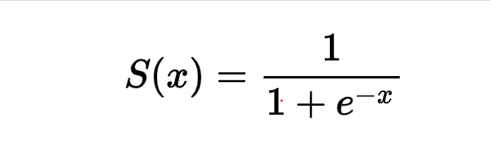

In [273]:
def sigmoid(num_samples):
    return 1/ (1 + np.exp(-num_samples))



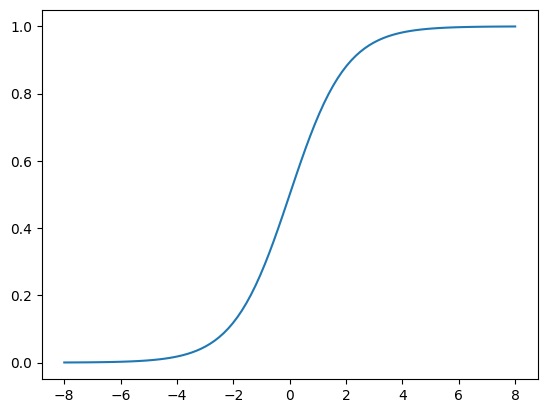

In [279]:
x = np.linspace(-8, 8, 100)

# Apply the sigmoid function
y = sigmoid(x)

plt.plot(x, y);

##### Training the Logistic regression model

In [362]:
from sklearn.linear_model import LogisticRegression

In [363]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

c:\Users\ADMIN PC\Documents\Zoomcamp\ML engineering\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [364]:
len(lr.coef_[0])

4056

In [365]:
lr.intercept_[0]

np.float64(-0.19902126360240616)

In [366]:
# Generate predictions for the positive class (churn)
y_pred = lr.predict_proba(X_val)[:, 1]
y_pred

array([0.00599936, 0.24070077, 0.22412806, ..., 0.1466844 , 0.81077092,
       0.81528591])

In [372]:
# Setting the threshold beyond which a customer is considered to churn
threshold = 0.5

churn_decision = (y_pred >= threshold)

In [377]:
churn_decision

array([False, False, False, ..., False,  True,  True])

In [383]:
val_df[churn_decision].customerid

2504    8433-WXGNA
4597    3440-JPSCL
5591    7228-OMTPN
4482    6711-FLDFB
3610    2612-RANWT
           ...    
2611    5976-JCJRH
4211    2034-CGRHZ
3999    5276-KQWHG
6240    6521-YYTYI
5282    3049-SOLAY
Name: customerid, Length: 305, dtype: object

#### Model Performance 

In [386]:
(y_val == churn_decision).mean()

np.float64(0.8062455642299503)

In [397]:
# Creatting a Dataframe to better visuallize the performance

df_predictions = pd.DataFrame()
df_predictions['actual'] = y_val
df_predictions['probability'] = y_pred
df_predictions['predictions'] = churn_decision.astype(int)
df_predictions['correct'] = df_predictions['predictions'] == df_predictions['actual']


In [398]:
df_predictions

,actual,probability,predictions,correct
0,0,0.005999,0,True
1,0,0.240701,0,True
2,0,0.224128,0,True
3,1,0.587487,1,True
4,0,0.216814,0,True
...,...,...,...,...
1404,0,0.378721,0,True
1405,1,0.063161,0,False
1406,0,0.146684,0,True
1407,1,0.810771,1,True


In [403]:
df_predictions['correct'].value_counts(normalize=True).loc[True]

np.float64(0.8062455642299503)

In [368]:
y_pred

array([0.00599936, 0.24070077, 0.22412806, ..., 0.1466844 , 0.81077092,
       0.81528591])

In [369]:
val_df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
565,5846-NEQVZ,Male,False,Yes,Yes,71,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),70.85,4973.4
199,3645-DEYGF,Male,False,No,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.75,20.75
6738,3590-TCXTB,Male,False,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,20.35
2504,8433-WXGNA,Male,False,No,No,2,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.70,189.2
556,2654-VBVPB,Female,False,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.90,19.9


#### Use the model


In [404]:
dict_vec = DictVectorizer()

In [422]:
full_train_dict = train_val_df.drop(['churn', 'customerid'], axis=1).to_dict(orient='records')
full_test_dict = test_df.drop(['churn', 'customerid'], axis=1).to_dict(orient='records')

In [423]:
y_full_train = train_val_df['churn']
y_full_test = test_df['churn']

In [424]:
X_full_train = dict_vec.fit_transform(full_train_dict)
X_test = dict_vec.transform(full_test_dict)

In [425]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

c:\Users\ADMIN PC\Documents\Zoomcamp\ML engineering\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [431]:
# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

In [432]:
churn_decision = (y_pred >= 0.5)

In [433]:
y_pred

array([0.05622558, 0.13158135, 0.32639678, ..., 0.00625413, 0.18971755,
       0.65763473])

In [435]:
(churn_decision == y_test).mean()

np.float64(0.8126330731014905)